# scikit-learn을 이용한 k 최근접 이웃

## 개요

- knn 알고리즘은 입력된 새로운 데이터와 가장 비슷한 k개 학습데이터를 찾아서 그 데이터의 평균이나 투표 결과를 결과값으로 되돌려주는 알고리즘


<img src="https://kr.mathworks.com/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif" width=300/>

- 분류 문제인 경우 위 그림처럼 가장 가까운 데이터를 찾고 많은 쪽에 속하도록 분류


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png" width=400/>

- 회귀문제인 경우 가까운 데이터의 타겟 평균값이 결과가 됨

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 데이터 로드

-  머신러닝은 크게 분류문제와 회귀문제로 구성되므로 여기서 간단한 분류문제에 대한 데이터, 회귀문제에 대한 데이터를 로드

In [45]:
# 여기서부터 시작
D = np.load('basic_clfreg2.npz')

In [46]:
D

In [47]:
X_clf = D['X_clf']
y_clf = D['y_clf']

X_reg = D['X_reg']
y_reg = D['y_reg']

display(X_clf, y_clf, X_reg, y_reg)

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.2       ],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504]])

array([-0.44822073,  0.33122576,  0.77932073,  0.03497884, -1.38773632,
       -2.47196233, -1.52730805,  1.49417157,  1.00032374,  0.22956153,
       -1.05979555,  0.7789638 ,  0.75418806, -1.51369739, -1.67303415,
       -0.90496988,  0.08448544, -0.52734666, -0.54114599, -0.3409073 ,
        0.21778193, -1.12469096,  0.37299129,  0.09756349, -0.98618122,
        0.96695428, -1.13455014,  0.69798591,  0.43655826, -0.95652133,
        0.03527881, -2.08581717, -0.47411033,  1.53708251,  0.86893293,
        1.87664889,  0.0945257 , -1.41502356,  0.25438895,  0.09398858])

## 데이터 확인

### 분류 데이터

In [48]:
X_clf.shape, y_clf.shape

# ((26, 2), (26,))
#  (N, D) (N,) -> 항상 이런 형태..(N: 데이터의 개수, D : 차원)

((26, 2), (26,))

In [49]:
X_clf[y_clf == 0][:,0]

array([11.0329545 ,  8.69289001,  8.1062269 ,  9.67284681,  8.68937095,
        8.92229526,  8.18378052,  8.7337095 , 10.06393839,  9.50048972,
        8.34468785,  9.50169345, 11.563957  ])

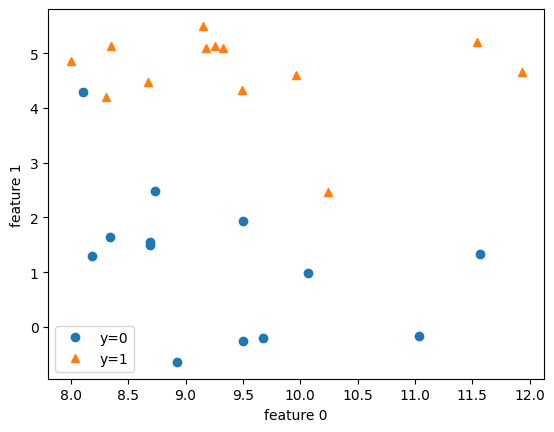

In [50]:
# 분류용 데이터를 타겟별로 나눠서 그리기[+]
fig = plt.figure()
ax = plt.axes()

ax.plot(X_clf[y_clf == 0][:,0], X_clf[y_clf == 0][:,1], 'o', label='y=0')
ax.plot(X_clf[y_clf == 1][:,0], X_clf[y_clf == 1][:,1], '^', label='y=1')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')

ax.legend()

plt.show()

### 회귀 데이터

In [51]:
X_reg.shape, y_reg.shape
# ((40, 1), (40,))

((40, 1), (40,))

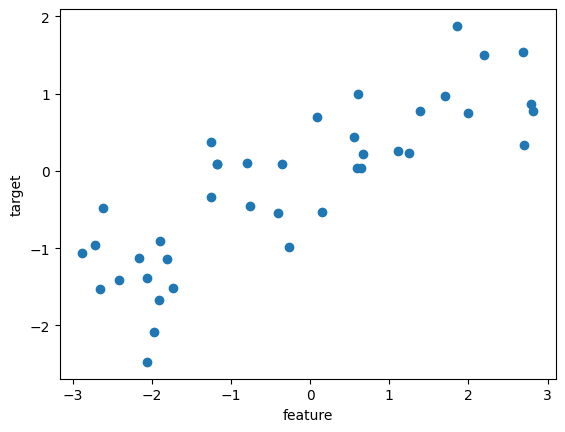

In [52]:
# 회귀용 데이터를 그리기[+]
fig = plt.figure()
ax = plt.axes()

ax.plot(X_reg, y_reg, 'o')

ax.set_xlabel('feature')
ax.set_ylabel('target')

plt.show()

### 데이터 학습, 테스트 세트로 나누기

- 머신러닝을 학습할 때 학습에 사용하는 데이터와 학습된 모델이 얼마나 잘 동작하는지 테스트할 데이터를 나누게 됨

In [53]:
# train_test_split 함수 로드 [+]
from sklearn.model_selection import train_test_split

In [54]:
# 데이터 분리 [+]
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, random_state=0)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state=0)

In [55]:
X_clf.shape, X_clf_train.shape, X_clf_test.shape

((26, 2), (19, 2), (7, 2))

## k-최근접 이웃 k-Nearest Neighbors

### 분류

In [56]:
# 모델 로드[+]
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# fit [+]
clf = KNeighborsClassifier(n_neighbors = 3) # n_neighbors : KNN 에서 k 수 선정
clf.fit(X_clf_train, y_clf_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
print(f"테스트 세트 예측: {clf.predict(X_clf_test)}")

테스트 세트 예측: [1 0 1 0 1 0 0]


In [59]:
y_clf_test

array([1, 0, 1, 0, 1, 1, 0])

In [60]:
print(f"테스트 세트 정확도: {clf.score(X_clf_test, y_clf_test)}")

테스트 세트 정확도: 0.8571428571428571


In [61]:
# 이웃 수를 1, 3, 9로 바꿔가면서 테스트 세트에 대한 정확도를 확인[*]

for n in [1, 3, 9]:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_clf_train, y_clf_train)

    print(f"{n} 이웃 모델 테스트 세트 정확도: {clf.score(X_clf_test, y_clf_test):.2f}")

1 이웃 모델 테스트 세트 정확도: 0.71
3 이웃 모델 테스트 세트 정확도: 0.86
9 이웃 모델 테스트 세트 정확도: 0.86


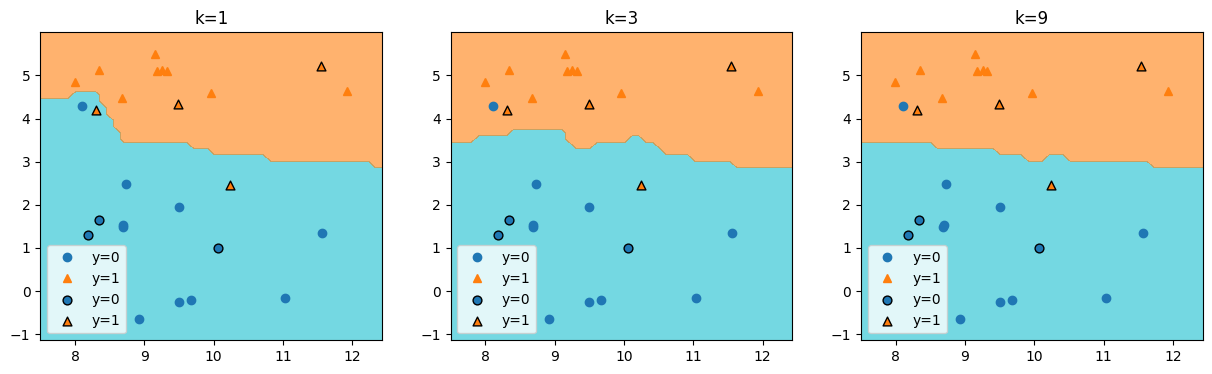

In [62]:
ngrid = 50
eps = 0.5

# 데이터의 최소, 최대값 보다 eps만큼 바깥 영역에서 그리드를 짠다.
x_min, x_max = X_clf[:, 0].min() - eps, X_clf[:, 0].max() + eps
y_min, y_max = X_clf[:, 1].min() - eps, X_clf[:, 1].max() + eps
xx = np.linspace(x_min, x_max, ngrid)
yy = np.linspace(y_min, y_max, ngrid)
X1, X2 = np.meshgrid(xx, yy)

# 그리드를 1차원을 펼치고 contour를 그릴 레벨설정
X_grid = np.c_[X1.ravel(), X2.ravel()]
levels = [0, 0.5, 1]

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3, dpi=100)

for i, n in enumerate([1,3,9]):
    # 모델을 생성하고 fit
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_clf_train, y_clf_train)

    # X_grid(그림그리는 공간 전부)에 대해서 예측
    decision_values = clf.predict(X_grid)

    # 결정경계를 그리고
    ax[i].contourf(X1, X2, decision_values.reshape(X1.shape),
                   levels = levels, colors=['C9', 'C1'], alpha=0.6)

    # 학습 데이터를 그리고
    ax[i].plot(X_clf_train[y_clf_train==0][:,0],
               X_clf_train[y_clf_train==0][:,1], 'o', label='y=0')
    ax[i].plot(X_clf_train[y_clf_train==1][:,0],
               X_clf_train[y_clf_train==1][:,1], '^', label='y=1')

    # 테스트 데이터를 그린다.
    ax[i].scatter(X_clf_test[y_clf_test==0][:,0],
                  X_clf_test[y_clf_test==0][:,1], marker='o', edgecolor='k',
                  s=40, label='y=0')
    ax[i].scatter(X_clf_test[y_clf_test==1][:,0],
                  X_clf_test[y_clf_test==1][:,1], marker='^', edgecolor='k',
                  s=40, label='y=1')
    ax[i].set_title(f"k={n}")
    ax[i].legend()

plt.show()


- 제일 왼쪽 그림은 학습 세트에 있는 파란 동그라미 하나를 살리기 위해 결정 경계가 구불 구불해진 모습을 보여줌

- 결과적으로 이렇게 구불 구불해진 결정 경계는 학습 세트는 100% 다 맞추지만 테스트 세트에서 오히려 안좋은 결과를 주게 됨

- 이런 현상을 **과대적합(과적합)over-fitting** 이라 함

- `k=3`, `k=9`같은 경우 결정 경계가 부드럽게 되면서(거의 가로 수평선처럼) 이런 현상이 사라지는 것을 확인할 수 있음

### 회귀

In [63]:
# [+]
from sklearn.neighbors import KNeighborsRegressor

In [64]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_reg_train, y_reg_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
print(f"테스트 세트 R2 score: {reg.score(X_reg_test, y_reg_test):.2f}")

테스트 세트 R2 score: 0.83


- 회귀의 경우 성능 지표는 목적함수가 있는 경우 목적함수값으로 사용하나 여기서는 결정계수로 불리는 $R^2$을 주로 사용

$$
R^2 = 1 - \frac{\sum_i (y_i- \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
$$

- 위 식은 데이터와 평균과의 차이 합에 대한 예측과의 차이의 비율

- 그냥 평균으로 예측한다면 0, 평균보다 낫다면 0보다 큰값, 예측과 데이터의 오차가 없다면 1

In [66]:
# 이웃 수를 1, 3, 9로 바꿔가면서 테스트 세트에 대한 R2 socre를 확인[*]

for n in [1, 3, 9]:
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_reg_train, y_reg_train)

    print(f"{n} 테스트 세트 R2 score: {reg.score(X_reg_test, y_reg_test):.2f}")


1 테스트 세트 R2 score: 0.35
3 테스트 세트 R2 score: 0.83
9 테스트 세트 R2 score: 0.65


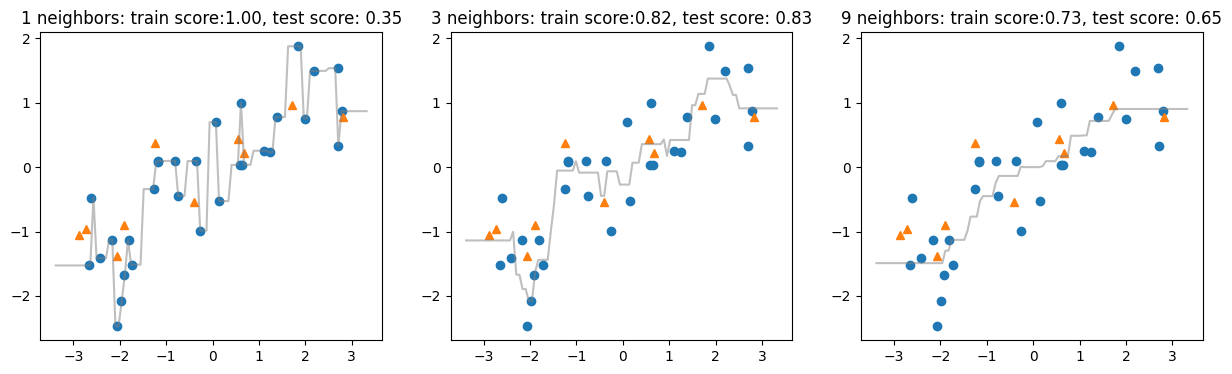

In [67]:
# 그림으로 확인

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3, dpi=100)
x_min, x_max = X_reg.min() - eps, X_reg.max() + eps
x = np.linspace(x_min, x_max, 100)

for i, n in enumerate([1,3,9]):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_reg_train, y_reg_train)
    pred = reg.predict(x.reshape(-1,1))

    ax[i].plot(x, pred, color='0.5', zorder=20, alpha=0.5)
    ax[i].plot(X_reg_train, y_reg_train, 'o', label='train')
    ax[i].plot(X_reg_test, y_reg_test, '^', label='test')

    ax[i].set_title(f"{n} neighbors: \
train score:{reg.score(X_reg_train, y_reg_train):.2f}, \
test score: {reg.score(X_reg_test, y_reg_test):.2f}")

plt.show()


- under fitting : 하이퍼파라미터 수정 -> 모델수정
- over fitting : 데이터 수집 -> 재학습

## 실습과제: 실제 데이터에 적용

### 분류: 유방암 데이터

- 아래 로드된 유방암 데이터의 특성을 조사하고 최적의 `n_neighbors`를 찾아보세요.

In [68]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    stratify=cancer.target, random_state=66
)

In [69]:
#[+] 데이터 셋을 에코시켜 실제 값들이 어떻게 저장되어 있는지 확인
X_train[:3]

array([[1.387e+01, 2.070e+01, 8.977e+01, 5.848e+02, 9.578e-02, 1.018e-01,
        3.688e-02, 2.369e-02, 1.620e-01, 6.688e-02, 2.720e-01, 1.047e+00,
        2.076e+00, 2.312e+01, 6.298e-03, 2.172e-02, 2.615e-02, 9.061e-03,
        1.490e-02, 3.599e-03, 1.505e+01, 2.475e+01, 9.917e+01, 6.886e+02,
        1.264e-01, 2.037e-01, 1.377e-01, 6.845e-02, 2.249e-01, 8.492e-02],
       [1.757e+01, 1.505e+01, 1.150e+02, 9.551e+02, 9.847e-02, 1.157e-01,
        9.875e-02, 7.953e-02, 1.739e-01, 6.149e-02, 6.003e-01, 8.225e-01,
        4.655e+00, 6.110e+01, 5.627e-03, 3.033e-02, 3.407e-02, 1.354e-02,
        1.925e-02, 3.742e-03, 2.001e+01, 1.952e+01, 1.349e+02, 1.227e+03,
        1.255e-01, 2.812e-01, 2.489e-01, 1.456e-01, 2.756e-01, 7.919e-02],
       [1.330e+01, 2.157e+01, 8.524e+01, 5.461e+02, 8.582e-02, 6.373e-02,
        3.344e-02, 2.424e-02, 1.815e-01, 5.696e-02, 2.621e-01, 1.539e+00,
        2.028e+00, 2.098e+01, 5.498e-03, 2.045e-02, 1.795e-02, 6.399e-03,
        1.829e-02, 1.956e-03, 1.420e

- Hold out 검증을 하기 위해 Train 세트를 다시 Train 세트와 Valide 세트로 나누고 Valid 세트에 대한 성능을 보면서 하이퍼 파라미터를 튜닝

In [70]:
test_size = 50

# train set을 train, valid로 쪼개는 것이 일반적이나
# 여기서는 결과 데모를 위해 편의상 test 데이터를 두개로 쪼갬
X_valid = X_test[:-test_size]
y_valid = y_test[:-test_size]
X_test = X_test[-test_size:]
y_test = y_test[-test_size:]

X_train.shape, X_valid.shape, X_test.shape

((426, 30), (93, 30), (50, 30))

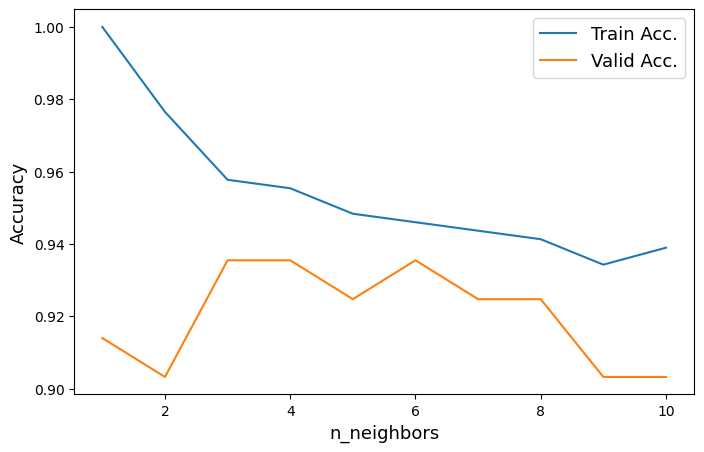

In [72]:
train_accuracy = []
valid_accuracy = []

# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

fig = plt.figure(figsize=(8,5))
ax = plt.axes()

####################################################
# [+]
# neighbors_settings에 대해서 모두 모델을 만들고 평가하기
for n in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n)

    # 모델 피팅
    clf.fit(X_train, y_train)

    # 훈련 세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))

    # x_valid 테스트 세트 정확도 저장
    valid_accuracy.append(clf.score(X_valid, y_valid))


####################################################

# 저장된 정확도를 n_neighbors에 대해서 그림
ax.plot(neighbors_settings, train_accuracy, label="Train Acc.")
ax.plot(neighbors_settings, valid_accuracy, label="Valid Acc.")

ax.set_ylabel("Accuracy", size=13)
ax.set_xlabel("n_neighbors", size=13)
ax.legend(fontsize=13)

plt.show()

train 셋과 valid셋의 격차가 가장 좁은 k = 6을 최종 결정

In [77]:
# 하이터파라미터 6이 결정되었으면 train, valid 합치고 최종적으로 학습
# np.concatenate 함수 사용
X_train2 = np.concatenate([X_train, X_valid])
y_train2 = np.concatenate([y_train, y_valid])

In [78]:
# 위에서 결정된 최적의 파라미터로 모델 수립
best_clf = KNeighborsClassifier(n_neighbors=6)
best_clf.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=6)

In [79]:
best_clf.score(X_test, y_test)

0.92

## 장단점

- 장점
    - 이해하기 쉬움, 알고리즘에 복잡한 수학이 등장하지 않음
    - 가장 먼저 시도해볼 수 있는 간결함
    - 모델 구축이 빠름, 단 데이터가 많으면 예측도 그에 비례해서 느려짐
     
- 단점
    - 거리를 기반으로 하므로 데이터 정규화, 표준화 같은 전처리 중요
    - 데이터의 특성수가 많아지면 '차원의 저주'로 잘 동작하지 않음